### 학습목표
- ZDNet 뉴스 사이트의 뉴스 제목과 주소(url)를 수집하여 DataFrame 으로 만들어보자!
- https://search.zdnet.co.kr/?kwd=%EC%97%94%EB%B9%84%EB%94%94%EC%95%84&area=&pageno=1&term=
- 순서
  1. url 주소를 통해 page 정보 받아오기
  2. 응답받은 웹문서 html 문서화
  3. 뉴스제목, 주소 수집 후 리스트에 저장
  4. 리스트를 DataFrame 으로 저장

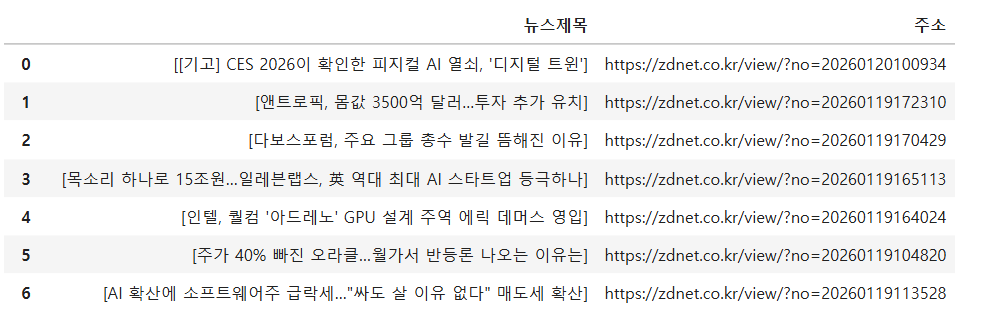

In [1]:
import requests as req
import pandas as pd
from bs4 import BeautifulSoup as bs

In [4]:
# 1. url 주소를 통해 page 정보 받아오기
url = 'https://search.zdnet.co.kr/?kwd=%EC%97%94%EB%B9%84%EB%94%94%EC%95%84&area=&pageno=1&term='
res = req.get(url)
# 2. 응답받은 웹문서 html 문서화
soup = bs(res.text,'lxml')

In [6]:
# 3. 뉴스제목 수집
title = soup.select('div.assetText>a>h3')

In [14]:
# 뉴스 주소 수집
# 정보를 수집할때는 명확하게 구분자를 주는 것이 좋다 (반드시 잘 수집되었는지 확인 필요!!)
link = soup.select('section.news_box div.assetText>a')
link

[<a href="https://zdnet.co.kr/view/?no=20260120100934">
 <!--<h3>[기고] CES 2026이 확인한 피지컬 AI 열쇠, '디지털 트윈'<br>code11=0300<br>code12=0030<br>code13=0140<br>code21=<br>code22=<br>code23=</h3>-->
 <h3>[기고] CES 2026이 확인한 피지컬 AI 열쇠, '디지털 트윈'</h3>
 <p>
 					로봇 혁신의 전제 조건은 공간을 이해하는 능력이다. 2026년 1월 라스베이거스에서 열린 CES 2026은 로봇 기술이 더 이상 전시장의 시연용 콘텐츠가 아니라, 산업과 생활 속에서 본격적으로 활용되는 전환점임을 보여준 행사였다. 미 소비자기술협회(CTA)가 올해 CES의 핵심 키워드로 '피지컬 AI'를 제시한 것도 같은 맥락에서다. 로봇은 이제 미래형 상상 속 존재가 아니라 산업 구조를 재편하는 독립적인 축으로 자리 잡았다. 현대자동차그룹과 보스턴다이내믹스가 공개한 '아틀라스' 휴머노이드 로봇은 인간과 유사한 자연스러운 움직임과 산업 현장 적용 가능성을 동시에 보여주며 큰 주목을 받았다. LG의 '클로이드', 스위치봇의 '오네로 H1' 등 휴머노이드·서비스 로봇들도 실제 가정과 사무 환경에서 활용에 가까운 시연을 선보였다. CES 2026은 "로봇이 무엇을 할 수 있는가"를 넘어 "로봇이 어디에서 쓰일 것인가"를 논의한 행사였다. 이러한 흐름 속에서 확인된 핵심은 로봇 기술의 무게중심이 하드웨어 성능에서 공간을 이해하고 처리하는 능력으로 이동하고 있다는 점이다. 현실 공간은 벽·기둥·설비 같은 고정 구조물뿐 아니라 사람·장비·이동체처럼 끊임없이 변화하는 요소가 복합적으로 얽혀 있다. 로봇은 이 환경을 매 순간 해석하고 판단해야 한다. 건물 내부를 이동하는 로봇만 봐도 고정된 구조를 인식하는 데 그치지 않고 주변 사람이나 장비의 움직임을 예측하며 경로 계획을 실시간으로 재산출하고 충돌 위험을 판단해 적절히 회피해야 한다.

In [15]:
len(title)
len(link)

20

In [16]:
# 수집한 요소를 리스트에 저장 (콘텐츠와 링크 추출 후 저장)
news_list = []
for i in range(len(title)):
    t = title[i].text
    l = link[i].get('href')
    news_list.append([t,l])

In [17]:
news_list

[["[기고] CES 2026이 확인한 피지컬 AI 열쇠, '디지털 트윈'",
  'https://zdnet.co.kr/view/?no=20260120100934'],
 ['앤트로픽, 몸값 3500억 달러…투자 추가 유치', 'https://zdnet.co.kr/view/?no=20260119172310'],
 ['다보스포럼, 주요 그룹 총수 발길 뜸해진 이유', 'https://zdnet.co.kr/view/?no=20260119170429'],
 ['목소리 하나로 15조원…일레븐랩스, 英 역대 최대 AI 스타트업 등극하나',
  'https://zdnet.co.kr/view/?no=20260119165113'],
 ["인텔, 퀄컴 '아드레노' GPU 설계 주역 에릭 데머스 영입",
  'https://zdnet.co.kr/view/?no=20260119164024'],
 ['주가 40% 빠진 오라클…월가서 반등론 나오는 이유는',
  'https://zdnet.co.kr/view/?no=20260119104820'],
 ['AI 확산에 소프트웨어주 급락세…"싸도 살 이유 없다" 매도세 확산',
  'https://zdnet.co.kr/view/?no=20260119113528'],
 ['NHN클라우드, 크래프톤 GPU 클러스터 사업 수주…운영 기술력 입증',
  'https://zdnet.co.kr/view/?no=20260119100834'],
 ["디캠프, '스타트업-전문 멘토' 연결 더 돕는다", 'https://zdnet.co.kr/view/?no=20260119094021'],
 ['[CES 2026 참여기업 좌담회] "중국 미래만 보여...그나마 한국이 견제"',
  'https://zdnet.co.kr/view/?no=20260118160930'],
 ['"엔비디아 中 AI 가속기 시장 점유율, 66%→8% 떨어질 것"',
  'https://zdnet.co.kr/view/?no=20260118004548'],
 ['구글 딥마인드 "중국 AI 

### 10 페이지의 뉴스데이터 수집 (수동 페이지 넘김)

- https://search.zdnet.co.kr/?kwd=%EC%97%94%EB%B9%84%EB%94%94%EC%95%84&area=&pageno=1&term=
- https://search.zdnet.co.kr/?kwd=%EC%97%94%EB%B9%84%EB%94%94%EC%95%84&area=&pageno=2&term=
- https://search.zdnet.co.kr/?kwd=%EC%97%94%EB%B9%84%EB%94%94%EC%95%84&area=&pageno=3&term=

In [18]:
# 반복문의 진행상황을 로딩바로 표기해주는 라이브러리
from tqdm import tqdm

In [19]:
news_list = []
for i in tqdm(range(1,11)):
    url = f'https://search.zdnet.co.kr/?kwd=%EC%97%94%EB%B9%84%EB%94%94%EC%95%84&area=&pageno={i}&term='
    res = req.get(url)
    soup = bs(res.text,'lxml')

    # 뉴스제목, 링크를 수집
    title = soup.select('div.assetText>a>h3')
    link = soup.select('section.news_box div.assetText>a')

    # 리스트 저장
    for i in range(len(title)):
        t = title[i].text
        l = link[i].get('href')
        news_list.append([t,l])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.83it/s]


In [21]:
len(news_list)

200

In [22]:
# DataFrame
pd.DataFrame(news_list , columns=['뉴스 제목','주소'])

,뉴스 제목,주소
0,"[기고] CES 2026이 확인한 피지컬 AI 열쇠, '디지털 트윈'",https://zdnet.co.kr/view/?no=20260120100934
1,"앤트로픽, 몸값 3500억 달러…투자 추가 유치",https://zdnet.co.kr/view/?no=20260119172310
2,"다보스포럼, 주요 그룹 총수 발길 뜸해진 이유",https://zdnet.co.kr/view/?no=20260119170429
3,"목소리 하나로 15조원…일레븐랩스, 英 역대 최대 AI 스타트업 등극하나",https://zdnet.co.kr/view/?no=20260119165113
4,"인텔, 퀄컴 '아드레노' GPU 설계 주역 에릭 데머스 영입",https://zdnet.co.kr/view/?no=20260119164024
...,...,...
195,"美 타임, 올해의 인물 'AI 설계자들' 뽑았다",https://zdnet.co.kr/view/?no=20251212100503
196,"브로드컴, 100억 달러 규모 미스터리 고객 정체는 '앤트로픽'",https://zdnet.co.kr/view/?no=20251212100257
197,"리비안, 자체 AI 칩으로 내년 초 '핸즈프리 자율주행' 상용화",https://zdnet.co.kr/view/?no=20251212090103
198,영예의 IEEE 수상자 발표: 기술 혁신으로 인류의 미래를 바꾸는 2026년 주역들,https://zdnet.co.kr/view/?no=20251212011003
